In [1]:
import imageio.v3 as io
img = io.imread('imageio:camera.png')


In [2]:
img.shape


(512, 512)

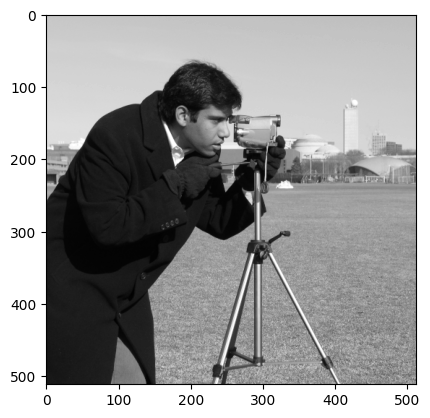

In [3]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap='gray')


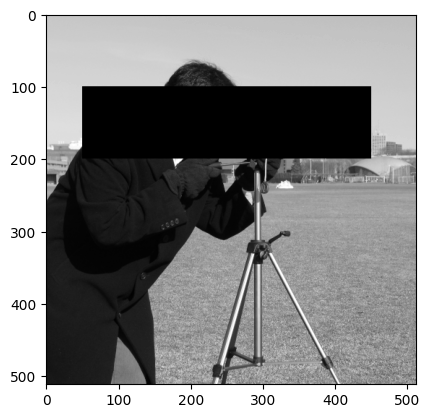

In [4]:
img[100:200, 50:450] = 0
plt.imshow(img, cmap='gray')


In [6]:
from bokeh.plotting import figure, show, output_notebook
output_notebook()


Loading BokehJS ...

In [41]:
from bokeh.plotting import figure, show, Column
from bokeh.models import DataTable, TableColumn, PointDrawTool, ColumnDataSource, CustomJS

p = figure(x_range=(0, 1), y_range=(0, 1), tools=[],
           title='Point Draw Tool', width=500, height=500)
p.background_fill_color = 'lightgrey'

source = ColumnDataSource({
    'x': [.5], 'y': [.5]
})

computed = ColumnDataSource({
    'bottom_left': [0],
    'bottom_right': [0],
    'top_left': [0],
    'top_right': [0]
})


callback = CustomJS(args=dict(source=source,computed=computed), code="""
var x=source.data['x'][0]
var y=source.data['y'][0]
computed.data['bottom_left'][0]=(1-x)*(1-y)
computed.data['bottom_right'][0]=x*(1-y)
computed.data['top_left'][0]=(1-x)*y
computed.data['top_right'][0]=x*y
computed.change.emit()
"""
                    )

renderer = p.scatter(x='x', y='y', source=source, color='blue', size=10)
columns = [TableColumn(field="bottom_left", title="bottom_left"),
           TableColumn(field="bottom_right", title="bottom_right"),
           TableColumn(field="top_left", title="top_left"),
           TableColumn(field="top_right", title="top_right")]
table = DataTable(source=computed, columns=columns, editable=True, height=200)

draw_tool = PointDrawTool(renderers=[renderer], empty_value='black')
source.js_on_change('data', callback)
p.add_tools(draw_tool)
p.toolbar.active_tap = draw_tool

show(Column(p, table))
